# Entrega - Atividade 2

#### Aluno: Matheus Raffaelle Nery Castellucci

### 1.Modifique o número de iterações para 30, 50, e 100 para avaliar o impacto da complexidade no tempo de execução, submeta os jobs via SLURM, verifique os tempos de execução e compare o impacto de cada nível de otimização.

In [2]:
iterations = [30, 50, 100]

conv_basicao = [1.69188, 2.79861, 5.59615]

conv_O1 = [0.452156, 0.752755, 1.51113]

conv_O2 = [0.349942, 0.589431, 1.15623]

conv_O3 = [0.154889, 0.257995, 0.510813]

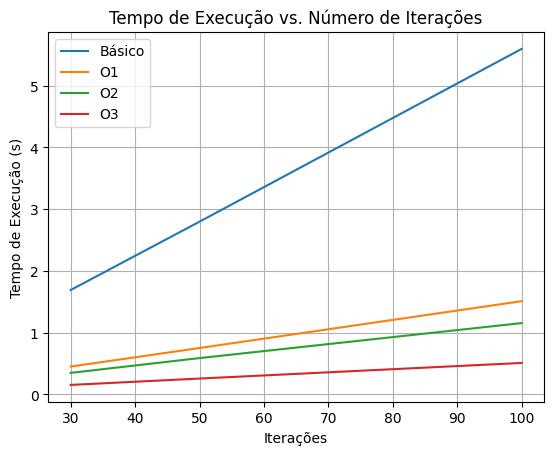

In [18]:
# Elabore gráficos que relacionam o tempo de execução com o número de iterações para cada nível de otimização.
import matplotlib.pyplot as plt

# Primeiro gráfico: Tempo de execução vs. Número de iterações
plt.plot(iterations, conv_basicao, label='Básico')
plt.plot(iterations, conv_O1, label='O1')
plt.plot(iterations, conv_O2, label='O2')
plt.plot(iterations, conv_O3, label='O3')
plt.xlabel('Iterações')
plt.ylabel('Tempo de Execução (s)')
plt.legend()
plt.title('Tempo de Execução vs. Número de Iterações')
plt.grid(True)
# Mostrar os gráficos
plt.show()

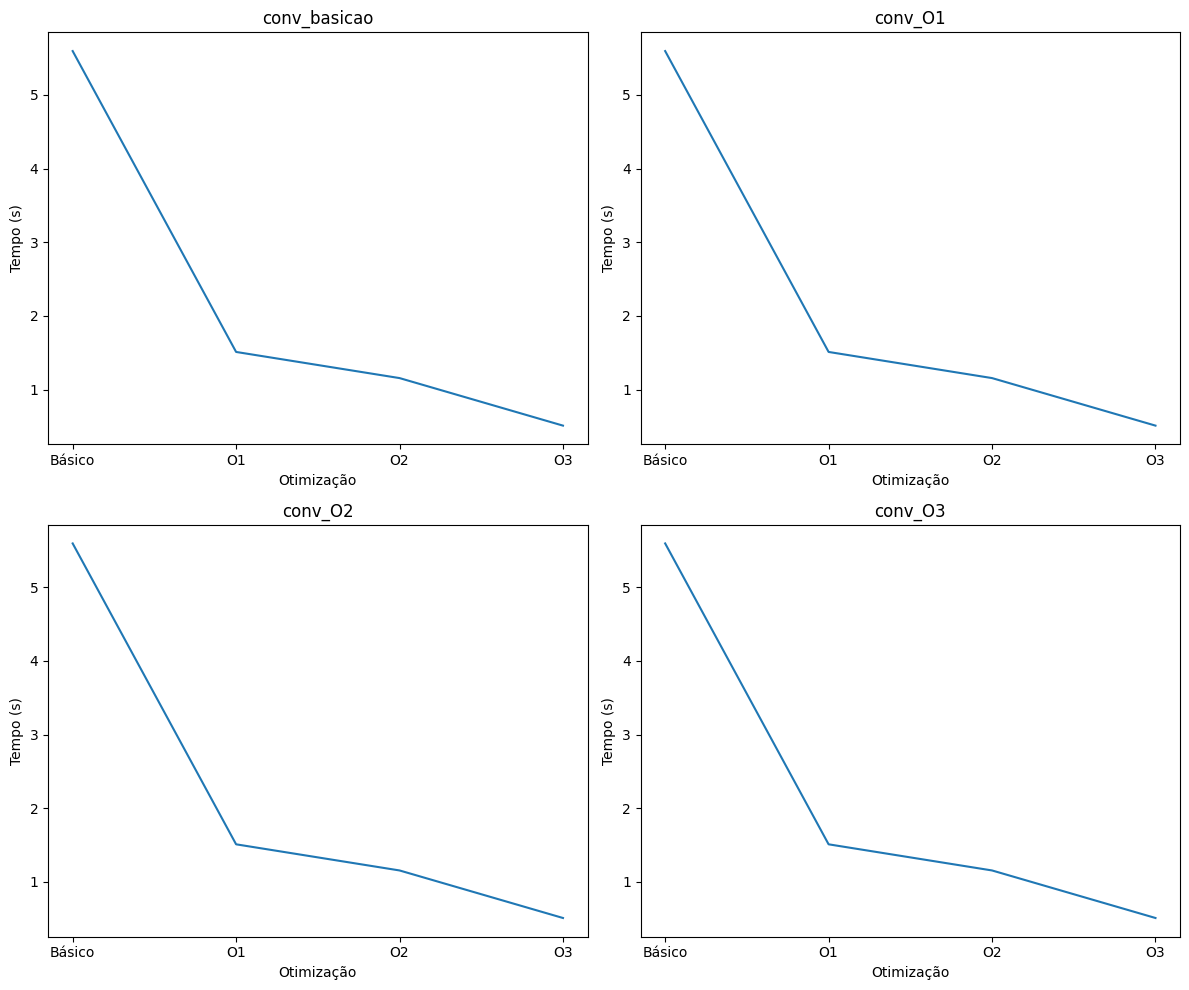

In [24]:
# Criar a figura e os eixos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Primeiro gráfico: conv_basicao
axs[0, 0].plot(['Básico', 'O1', 'O2', 'O3'], [conv_basicao[2], conv_O1[2], conv_O2[2], conv_O3[2]])
axs[0, 0].set_xlabel('Otimização')
axs[0, 0].set_ylabel('Tempo (s)')
axs[0, 0].set_title('conv_basicao')

# Segundo gráfico: conv_O1
axs[0, 1].plot(['Básico', 'O1', 'O2', 'O3'], [conv_basicao[2], conv_O1[2], conv_O2[2], conv_O3[2]])
axs[0, 1].set_xlabel('Otimização')
axs[0, 1].set_ylabel('Tempo (s)')
axs[0, 1].set_title('conv_O1')

# Terceiro gráfico: conv_O2
axs[1, 0].plot(['Básico', 'O1', 'O2', 'O3'], [conv_basicao[2], conv_O1[2], conv_O2[2], conv_O3[2]])
axs[1, 0].set_xlabel('Otimização')
axs[1, 0].set_ylabel('Tempo (s)')
axs[1, 0].set_title('conv_O2')

# Quarto gráfico: conv_O3
axs[1, 1].plot(['Básico', 'O1', 'O2', 'O3'], [conv_basicao[2], conv_O1[2], conv_O2[2], conv_O3[2]])
axs[1, 1].set_xlabel('Otimização')
axs[1, 1].set_ylabel('Tempo (s)')
axs[1, 1].set_title('conv_O3')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos

plt.show()

#### Discussão: Analise como as diferentes flags de otimização impactaram o desempenho. Identifique quais otimizações trouxeram maiores ganhos e em quais situações.

Maior Ganho: A flag de otimização O3 trouxe os maiores ganhos de desempenho, especialmente para um maior número de iterações.

Melhor Custo-Benefício Inicial: A otimização O1 já traz um ganho considerável com um custo computacional menor em comparação com O2 e O3.

Recomendação: Para aplicações onde o tempo de execução é crítico e justifica-se o uso de otimizações mais agressivas, O3 é a melhor escolha. Para um bom equilíbrio entre desempenho e custo computacional de otimização, O1 pode ser suficiente.

### Profiling com Gprof e Valgrind

### Análise do Flat Profile

O flat profile é uma visão que mostra o tempo total gasto em cada função individualmente, sem considerar as funções chamadas dentro dela. 

- **apply_filter**:
  - Esta função consome **96.25%** do tempo total de execução, o que indica que ela é a função crítica no código. 
  - Foi chamada 100 milhões de vezes, com um tempo médio de 7.70 ns por chamada.
- **_init**:
  - Representa 2.50% do tempo total, mas não é diretamente crítica para o desempenho.
- **main**:
  - Consome 1.25% do tempo total, mas grande parte desse tempo é gasto chamando `apply_filter`.

### Análise do Call Graph

O call graph nos dá uma visão mais detalhada de como as funções se relacionam umas com as outras e como o tempo é distribuído entre elas.

- **main**:
  - É o ponto de entrada do programa e chama `apply_filter` 100 milhões de vezes.
  - Embora `main` apareça com 97.5% do tempo total, quase todo esse tempo é devido à chamada de `apply_filter`.
- **apply_filter**:
  - Confirma-se como a função que consome a maior parte do tempo de execução do programa (96.2% do tempo total). 
  - Não chama outras funções, o que indica que o tempo de execução está concentrado exclusivamente na execução de suas operações internas.

### Funções Críticas

- **apply_filter(int, int, int (*) [1000], int (*) [5])** é a função mais crítica. Como ela representa a maior parte do tempo de execução, otimizar essa função traria o maior impacto no desempenho do programa.

### Possíveis Otimizações

1. **Redução de Chamadas**:
   - Reduzir o número de chamadas para `apply_filter`. Por exemplo, ao aplicar o filtro em blocos maiores de dados ao invés de chamá-lo repetidamente para pequenas porções.

4. **Paralelização**:
   - Podemos reescrever o código para que ele gire em torno da parelização da função `apply_filter`

### Conclusão

A função `apply_filter` é o principal gargalo do programa e oferece o maior potencial para melhorias de desempenho. Focar em otimizar essa função, seja reduzindo o número de chamadas ou melhorando sua eficiência interna, provavelmente resultará em uma significativa redução no tempo de execução total.

### Analise o uso de CPU e cache. Identifique funções e loops que são candidatos para otimização. Compare as saídas do gprof e Callgrind.

Eu fiz tudo até o fim do roteiro, porém como no final geramos um gráfico e o Franky não tem suporte para gráficos, não consegui analisar o gráfico.